In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2

In [3]:
def compute_reward(image, size=60):
        """Compute the step reward. This externalizes the reward function and makes
        it dependent on a desired goal and the one that was achieved. If you wish to include
        additional rewards that are independent of the goal, you can include the necessary values
        to derive it in 'info' and compute it accordingly.
        Args:
            achieved_goal (object): the goal that was achieved during execution
            desired_goal (object): the desired goal that we asked the agent to attempt to achieve
            info (dict): an info dictionary with additional information
        Returns:
            float: The reward that corresponds to the provided achieved goal w.r.t. to the desired
            goal. Note that the following should always hold true:
                ob, reward, done, info = env.step()
                assert reward == env.compute_reward(ob['achieved_goal'], ob['goal'], info)
        """
        
        # code from https://www.pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/
        
        # grab the dimensions of the image and use the dimensions to
        # derive the center (x, y)-coordinates
        (h, w, m) = image.shape
        (cX, cY) = (int(w / 2.0), int(h / 2.0))

        fft = np.fft.fft2(image)
        fftShift = np.fft.fftshift(fft)

        # zero-out the center of the FFT shift (i.e., remove low
        # frequencies), apply the inverse shift such that the DC
        # component once again becomes the top-left, and then apply
        # the inverse FFT
        fftShift[cY - size:cY + size, cX - size:cX + size] = 0
        fftShift = np.fft.ifftshift(fftShift)
        recon = np.fft.ifft2(fftShift)

        # compute the magnitude spectrum of the reconstructed image,
        # then compute the mean of the magnitude values
        magnitude = 20 * np.log(np.abs(recon))
        mean = np.mean(magnitude)
        # the image will be considered "blurry" if the mean value of the
        # magnitudes is less than the threshold value
        return mean

png: -58.418648938415494
numpy: 52.40662146706809


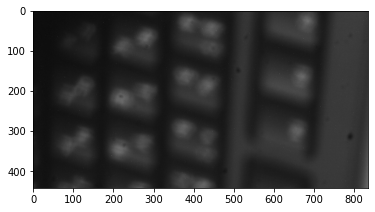

In [19]:
img = mpimg.imread(r'C:\Users\CIG\Documents\MATLAB\imgs\img_0_True_52_40662146706809.png')
plt.imshow(img)
print('png:', compute_reward(img, size=60))

img = np.load(r'C:\Users\CIG\Documents\MATLAB\imgs\numpy_0_True_52.40662146706809.npy')
print('numpy:', compute_reward(img, size=60))

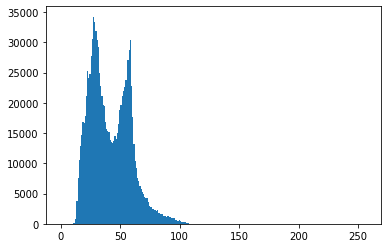

In [20]:
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

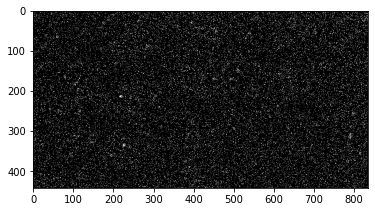

In [25]:
#https://theailearner.com/2019/05/13/difference-of-gaussians-dog/

img = cv2.imread(r'C:\Users\CIG\Documents\MATLAB\imgs\img_0_True_52_40662146706809.png')
 
# Apply 3x3 and 7x7 Gaussian blur
low_sigma = cv2.GaussianBlur(img,(3,3),0)
high_sigma = cv2.GaussianBlur(img,(5,5),0)
 
# Calculate the DoG by subtracting
dog = low_sigma - high_sigma
plt.imshow(dog)

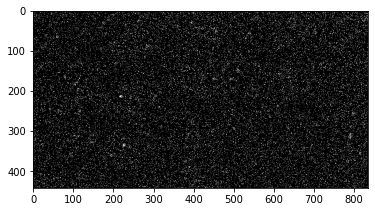

In [28]:
img = np.load(r'C:\Users\CIG\Documents\MATLAB\imgs\numpy_0_True_52.40662146706809.npy')
 
# Apply 3x3 and 7x7 Gaussian blur
low_sigma = cv2.GaussianBlur(img,(3,3),0)
high_sigma = cv2.GaussianBlur(img,(5,5),0)
 
# Calculate the DoG by subtracting
dog = low_sigma - high_sigma
plt.imshow(dog)

png: -56.74088977008954
numpy: 54.084380468736654


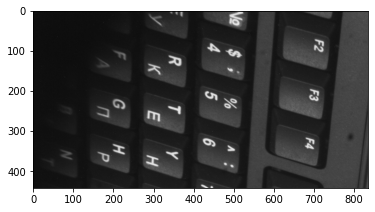

In [21]:
img = mpimg.imread(r'C:\Users\CIG\Documents\MATLAB\imgs\img_11_True_54.084380468736654.png')
plt.imshow(img)
print('png:', compute_reward(img, size=60))

img = np.load(r'C:\Users\CIG\Documents\MATLAB\imgs\numpy_11_True_54.084380468736654.npy')
print('numpy:', compute_reward(img, size=60))

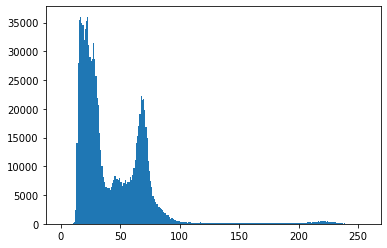

In [22]:
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

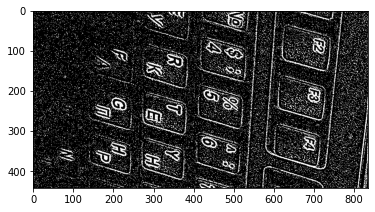

In [26]:
#https://theailearner.com/2019/05/13/difference-of-gaussians-dog/

img = cv2.imread(r'C:\Users\CIG\Documents\MATLAB\imgs\img_11_True_54.084380468736654.png')
 
# Apply 3x3 and 7x7 Gaussian blur
low_sigma = cv2.GaussianBlur(img,(3,3),0)
high_sigma = cv2.GaussianBlur(img,(5,5),0)
 
# Calculate the DoG by subtracting
dog = low_sigma - high_sigma
plt.imshow(dog)

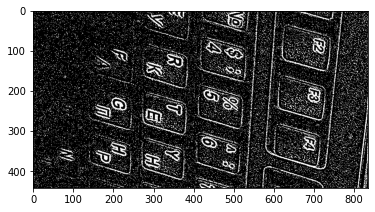

In [27]:
img = np.load(r'C:\Users\CIG\Documents\MATLAB\imgs\numpy_11_True_54.084380468736654.npy')
 
# Apply 3x3 and 7x7 Gaussian blur
low_sigma = cv2.GaussianBlur(img,(3,3),0)
high_sigma = cv2.GaussianBlur(img,(5,5),0)
 
# Calculate the DoG by subtracting
dog = low_sigma - high_sigma
plt.imshow(dog)